In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
dataset  = pd.read_csv('data/stud.csv')

In [56]:
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [58]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [59]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
dataset['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [62]:
dataset['reading_score'].value_counts()

reading_score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23     1
40     1
Name: count, Length: 72, dtype: int64

In [63]:
dataset.duplicated().value_counts()


False    1000
Name: count, dtype: int64

In [64]:
dataset.duplicated().sum()

np.int64(0)

In [65]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [66]:
print("Categories in 'gender' variable : ",end= "")
print(dataset['gender'].unique())

Categories in 'gender' variable : ['female' 'male']


In [67]:
print("Categories in 'race_ethnicity' variable : ",end= "")
print(dataset['race_ethnicity'].unique())

Categories in 'race_ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']


In [68]:
print("Categories in 'parental_level_of_education' variable : ",end= "")
print(dataset['parental_level_of_education'].unique())

Categories in 'parental_level_of_education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [69]:
print("Categories in 'lunch' variable : ",end= "")
print(dataset['lunch'].unique())

Categories in 'lunch' variable : ['standard' 'free/reduced']


In [70]:
print("Categories in 'test_preparation_course' variable : ",end= "")
print(dataset['test_preparation_course'].unique())

Categories in 'test_preparation_course' variable : ['none' 'completed']


In [71]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "O" ]

print('We have {} numerical feature: {}'.format(len(numerical_features),numerical_features))
print('\nWe have {} categorical feature: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical feature: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical feature: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [72]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [73]:
dataset['total score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']
dataset['average'] = dataset['total score'] / 3
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [75]:
reading_full = dataset[dataset['reading_score'] == 100]['average'].count()
writing_full = dataset[dataset['writing_score'] == 100]['average'].count()
math_full = dataset[dataset['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: ",math_full)
print(f"Number of students with full marks in Writing: ",writing_full)
print(f"Number of students with full marks in reading: ",reading_full)


Number of students with full marks in Maths: 

 7
Number of students with full marks in Writing:  14
Number of students with full marks in reading:  17


In [76]:
reading_less_20 = dataset[dataset['reading_score'] <= 20]['average'].count()
writing_less_20 = dataset[dataset['writing_score'] <= 20]['average'].count()
math_less_20 = dataset[dataset['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: ",math_less_20)
print(f"Number of students with less than 20 marks in Writing: ",writing_less_20)
print(f"Number of students with less than 20 marks in reading: ",reading_less_20)

Number of students with less than 20 marks in Maths:  4
Number of students with less than 20 marks in Writing:  3
Number of students with less than 20 marks in reading:  1


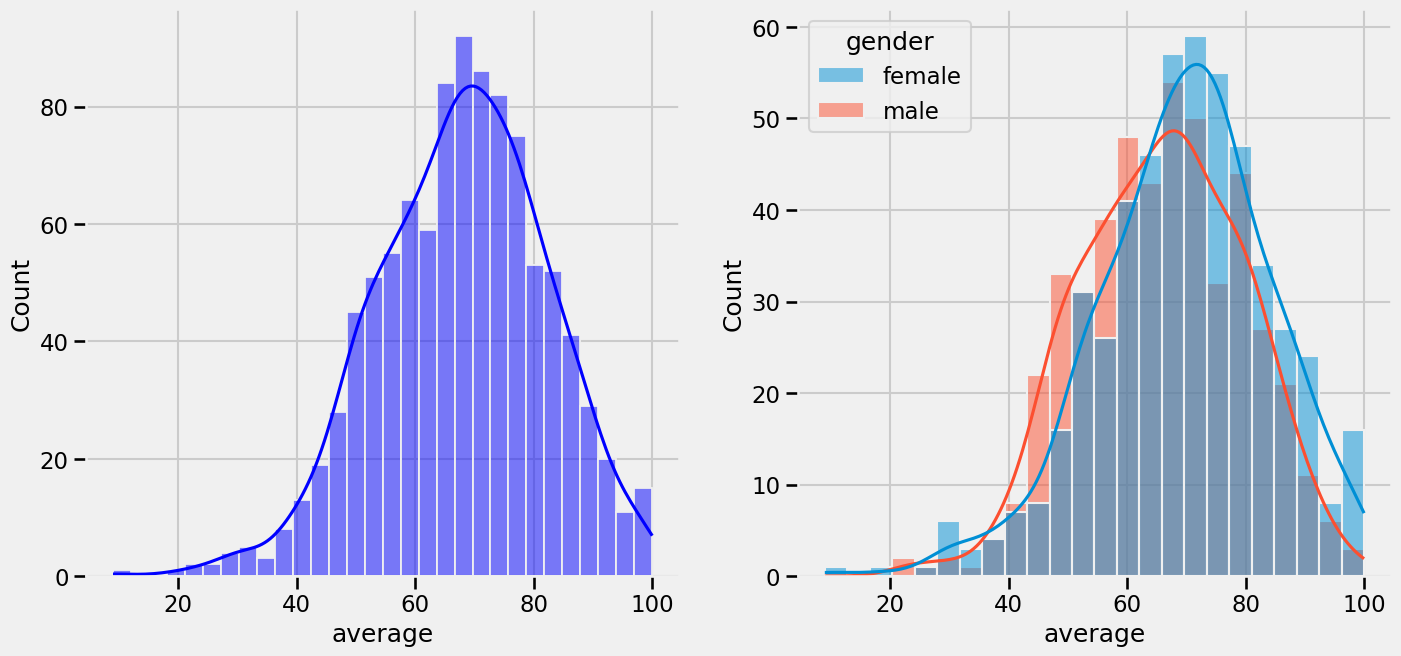

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot
sns.histplot(data=dataset, x="average", bins=30, kde=True, color='b', ax=axs[0])

# Second plot
sns.histplot(data=dataset, x="average", kde=True, hue='gender', ax=axs[1])

plt.show()


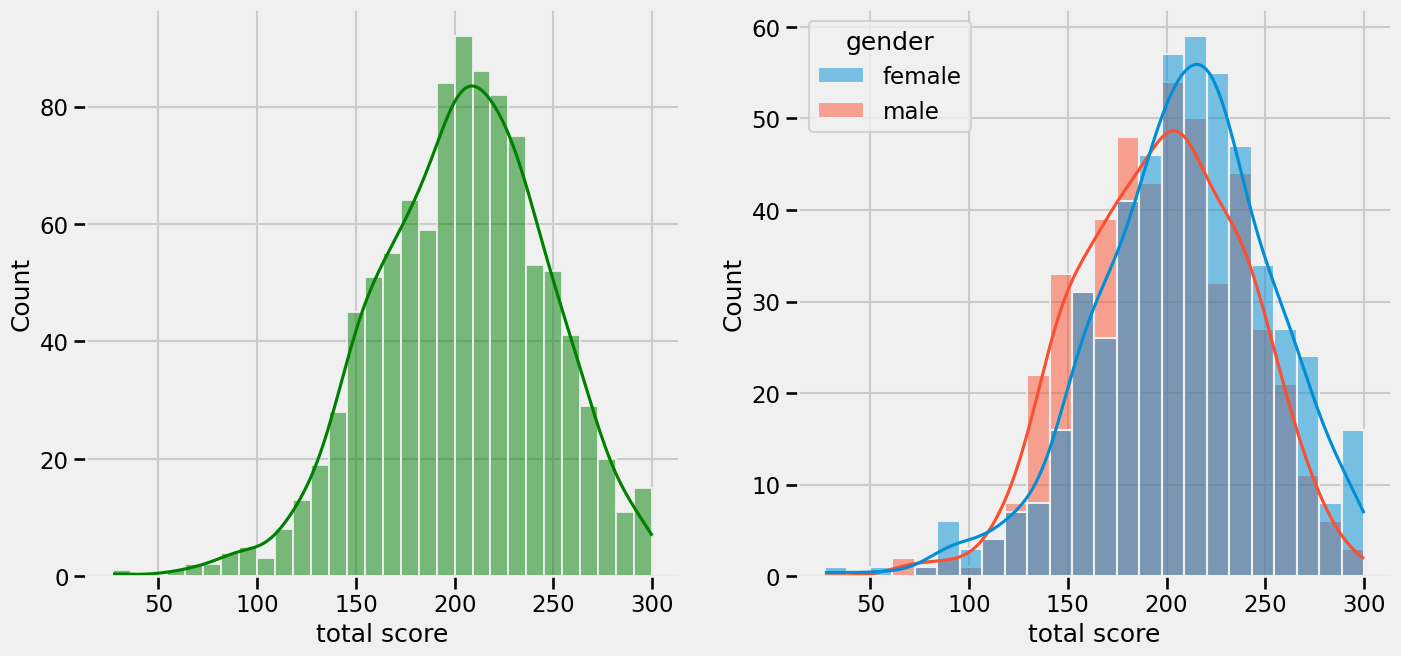

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot
sns.histplot(data=dataset, x="total score", bins=30, kde=True, color='g', ax=axs[0])

# Second plot
sns.histplot(data=dataset, x="total score", kde=True, hue='gender', ax=axs[1])

plt.show()


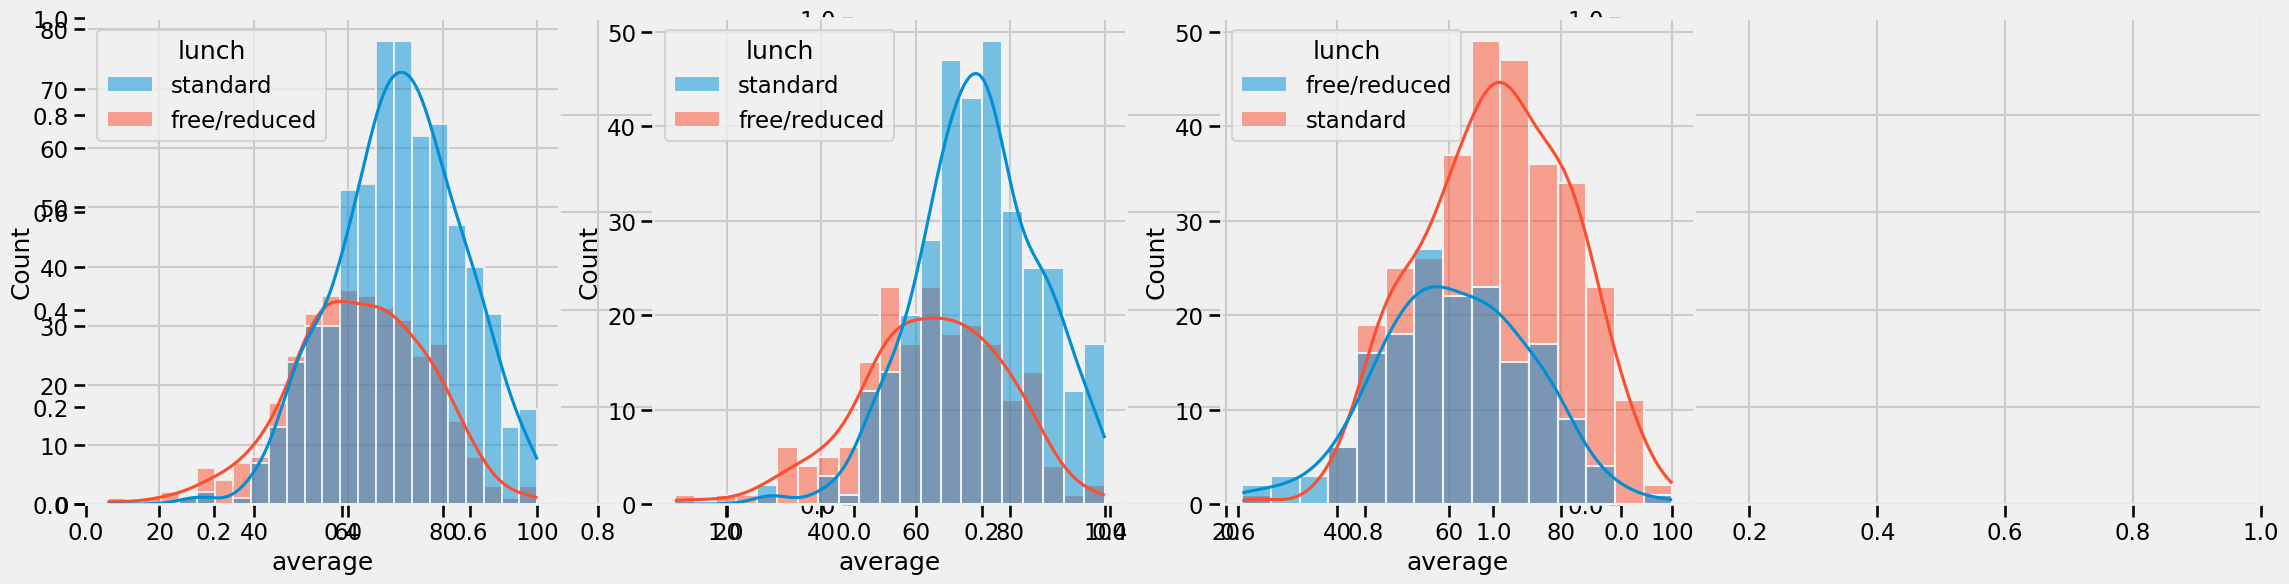

In [79]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = dataset,x = 'average',kde = True,hue = 'lunch')
plt.subplot(142)
sns.histplot(data = dataset[dataset.gender == 'female'],x = 'average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data = dataset[dataset.gender == 'male'],x = 'average',kde = True,hue='lunch')
plt.show()

In [80]:
dataset.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

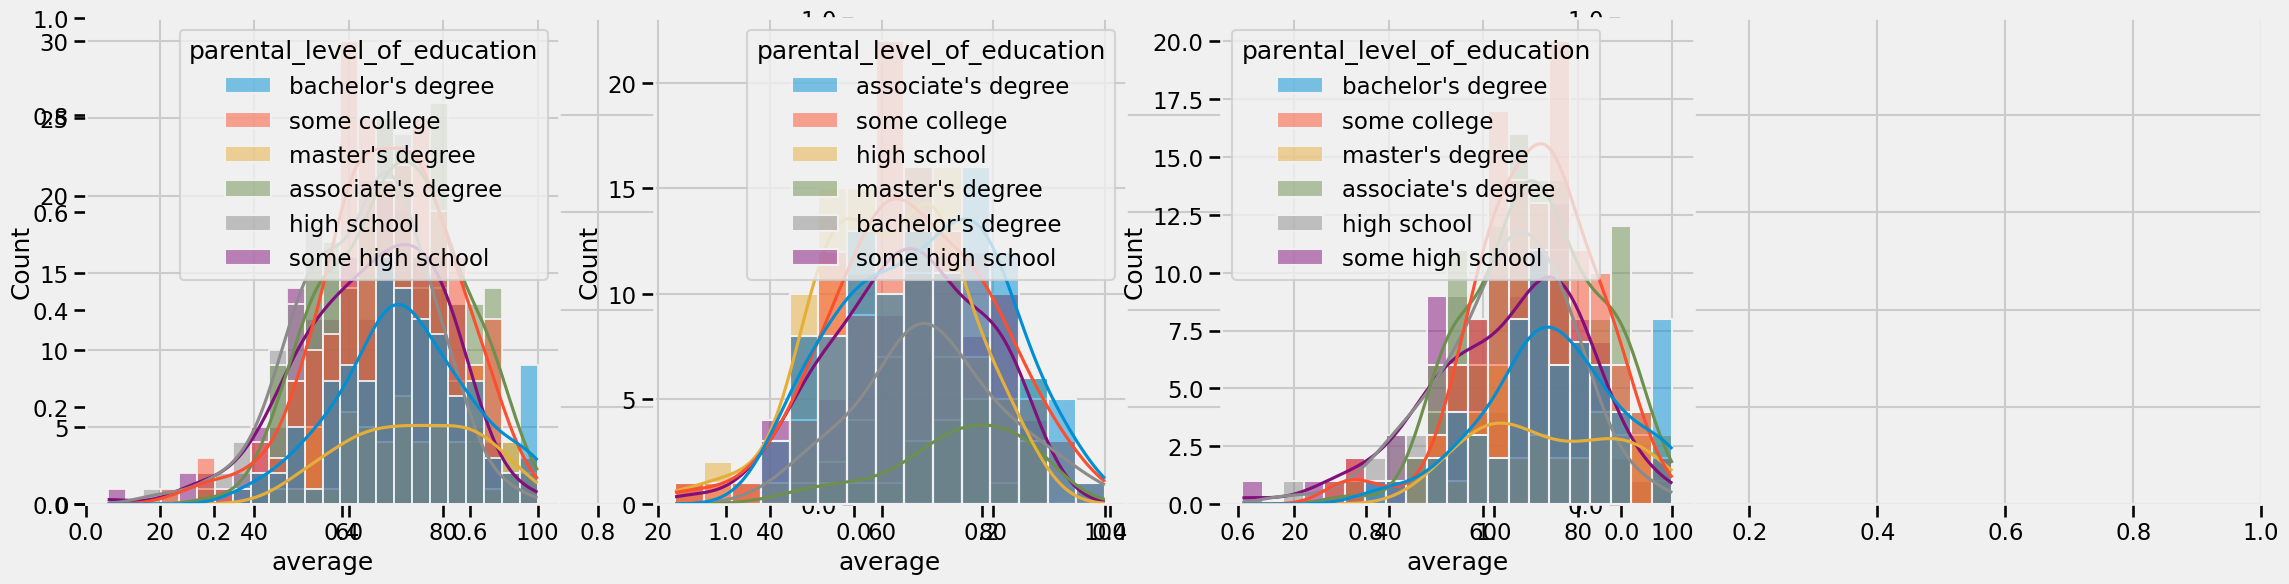

In [81]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=dataset, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(142)
sns.histplot(data=dataset[dataset.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(143)
sns.histplot(data=dataset[dataset.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')

plt.show()


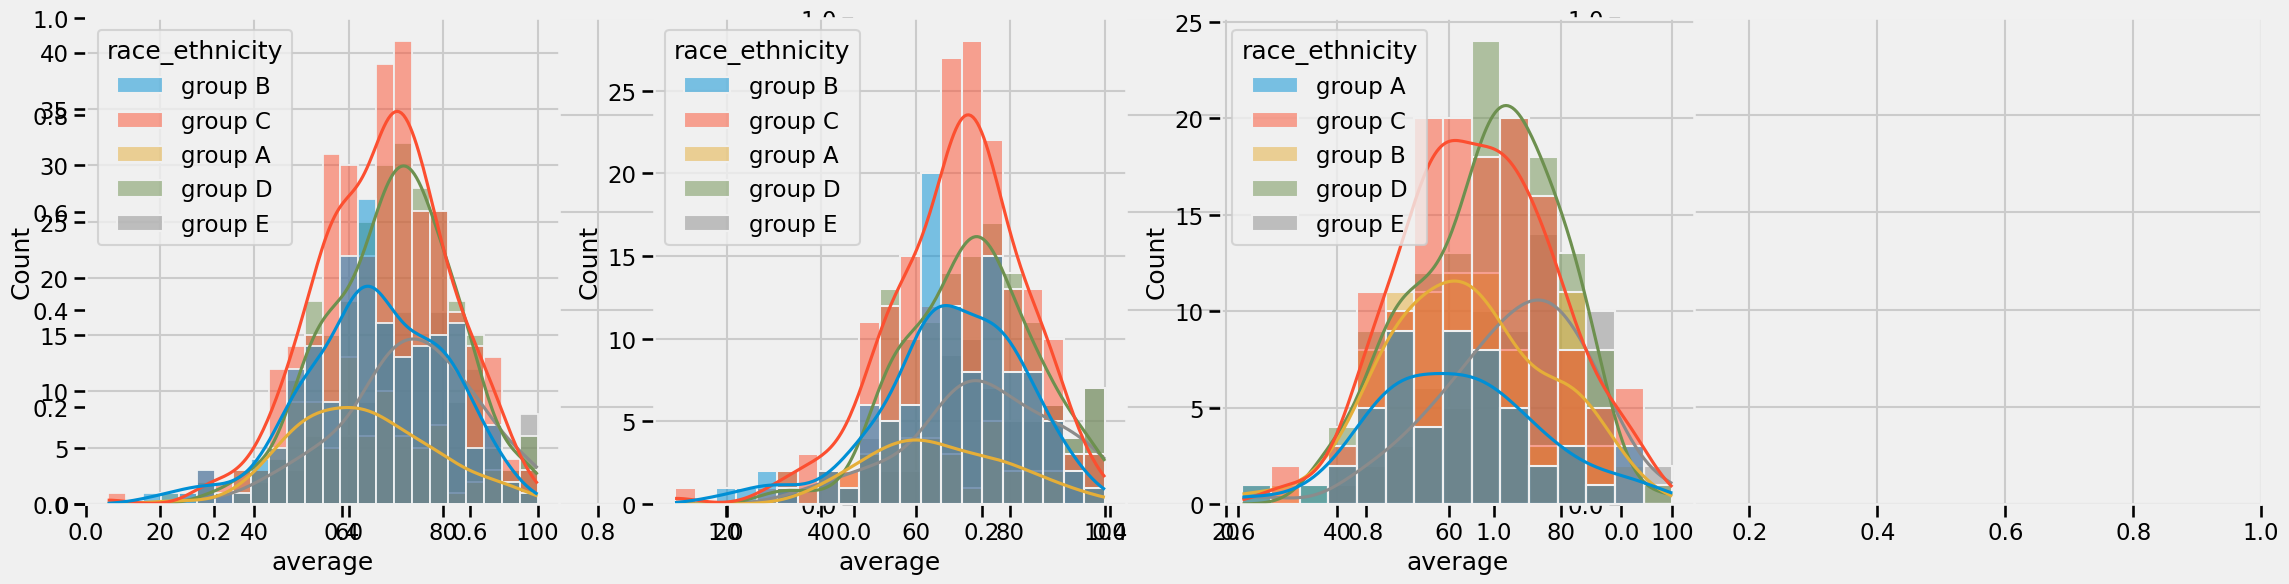

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

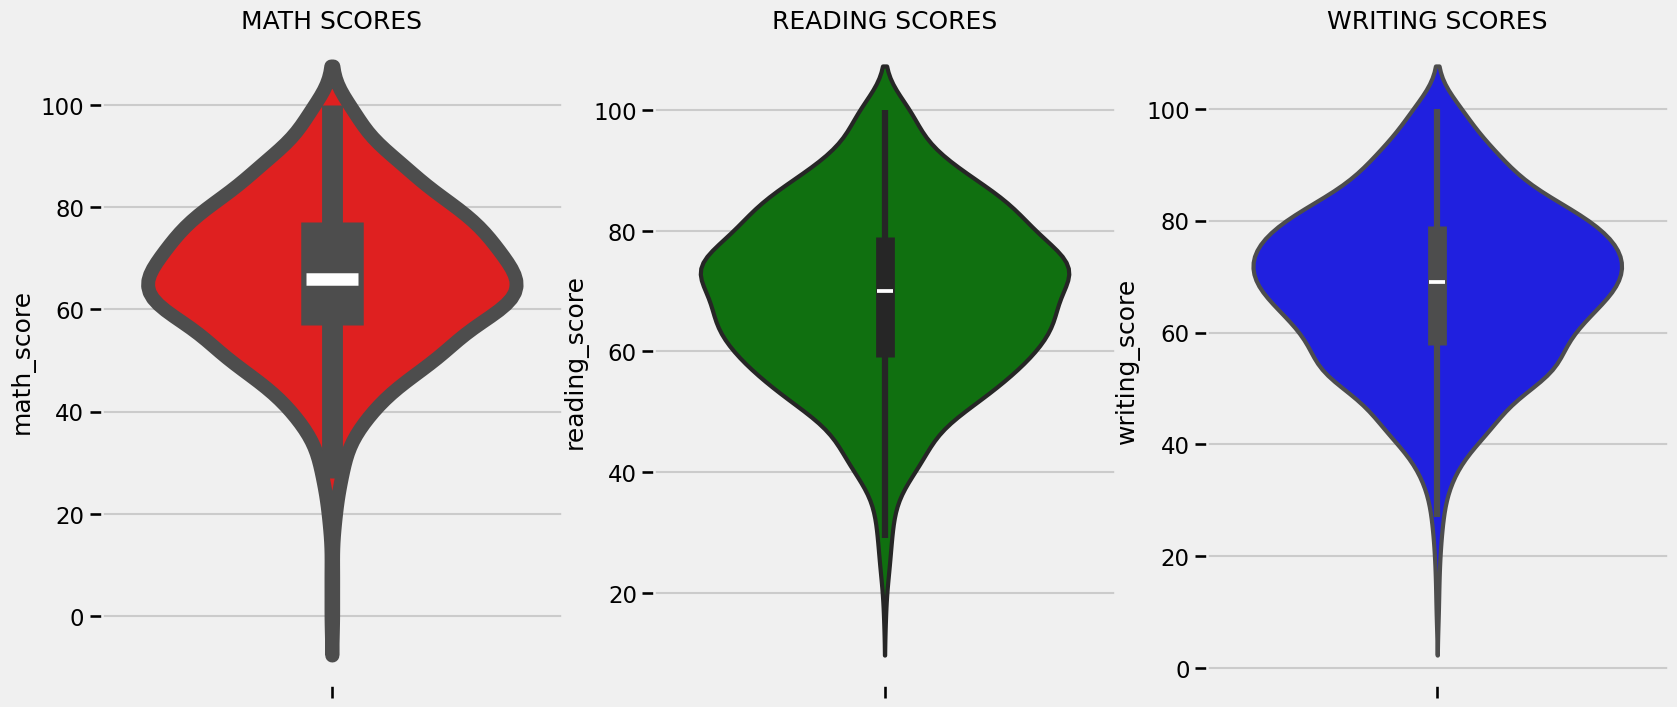

In [108]:
plt.figure(figsize=(18, 8))

# Plot 1
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=dataset, color='red',linewidth=10)

# Plot 2
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=dataset, color='green',linewidth=3)

# Plot 3
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=dataset, color='blue',linewidth=3)

plt.show()


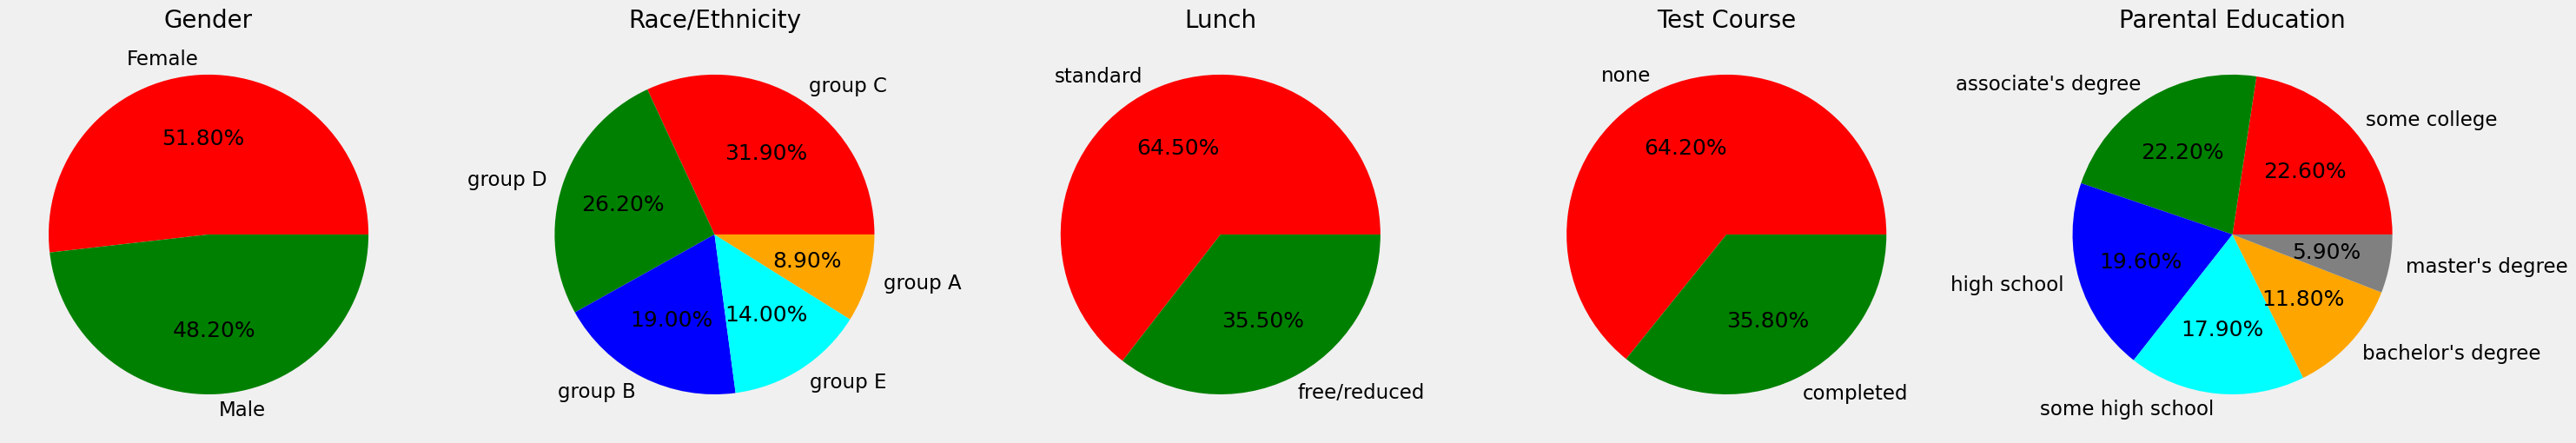

In [84]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = dataset['race_ethnicity'].value_counts()
labels = ['group C', 'group D', 'group B', 'group E', 'group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = ['standard', 'free/reduced']
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = dataset['test_preparation_course'].value_counts()
labels = ['none', 'completed']
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = dataset['parental_level_of_education'].value_counts()
labels = [
	"some college",
	"associate's degree",
	"high school",
	"some high school",
	"bachelor's degree",
	"master's degree"
]
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid(False)

plt.show()


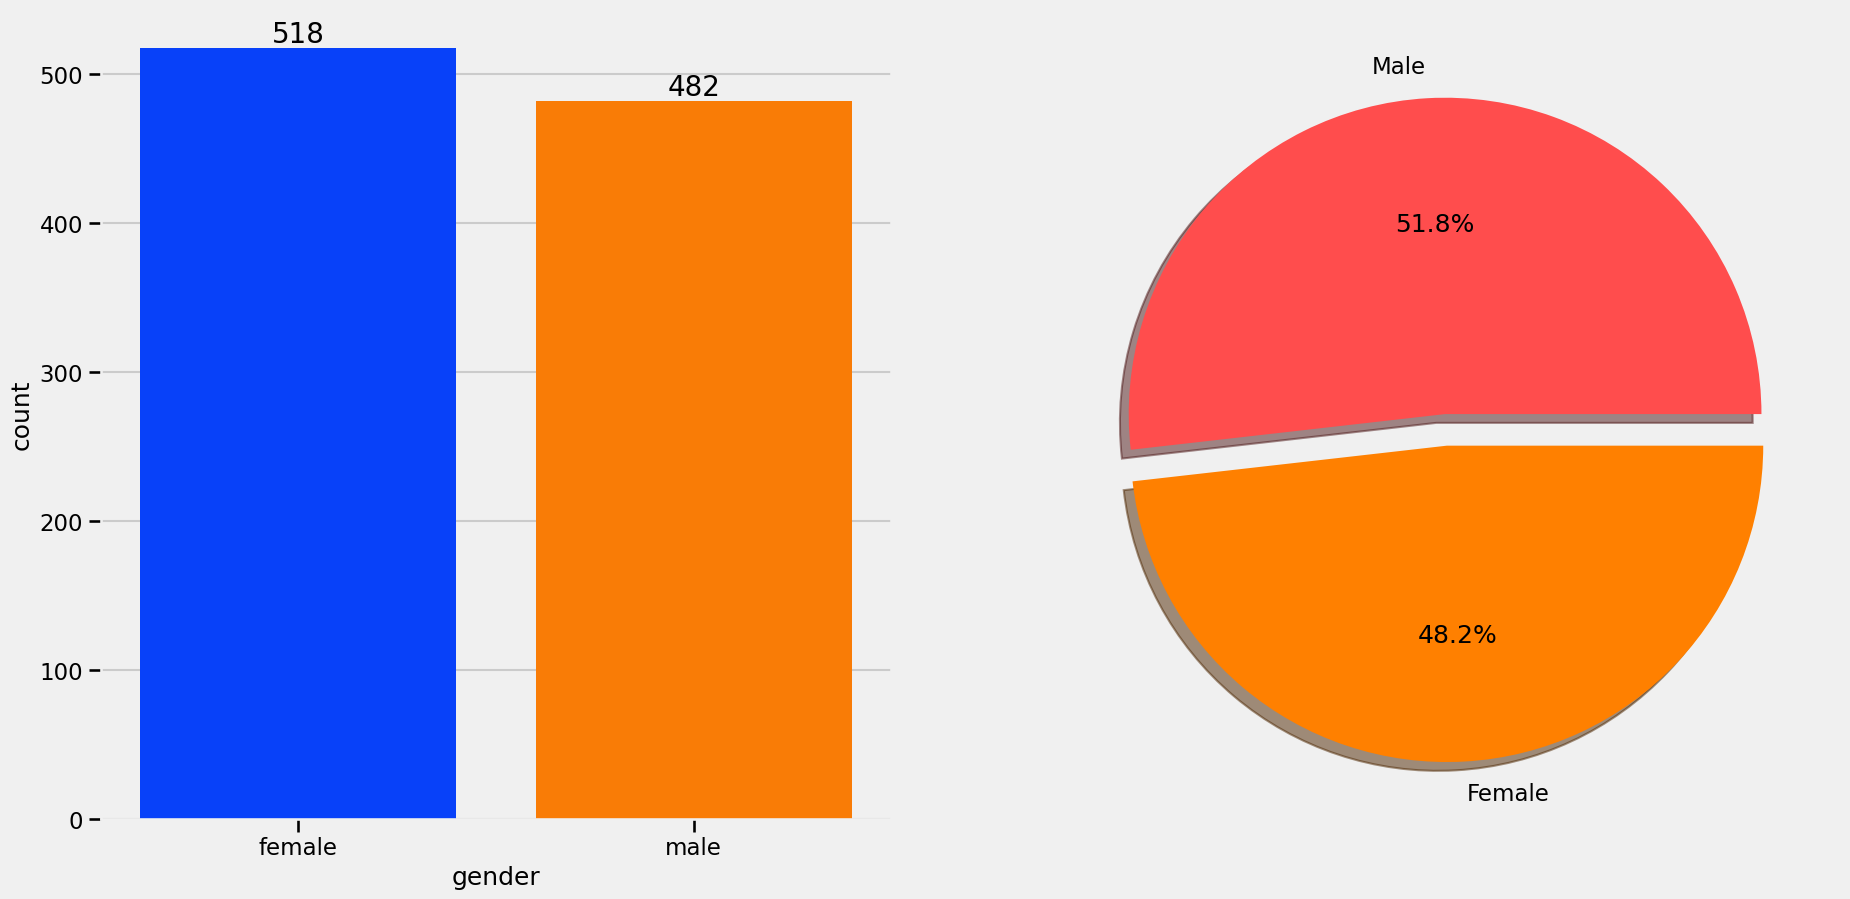

In [85]:
f,ax = plt.subplots(1,2,figsize = (20,10))
sns.countplot(x = dataset['gender'],data=dataset,palette='bright',ax = ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dataset['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [86]:
gender_group = dataset.groupby('gender').mean(numeric_only=True)
print(gender_group)


        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


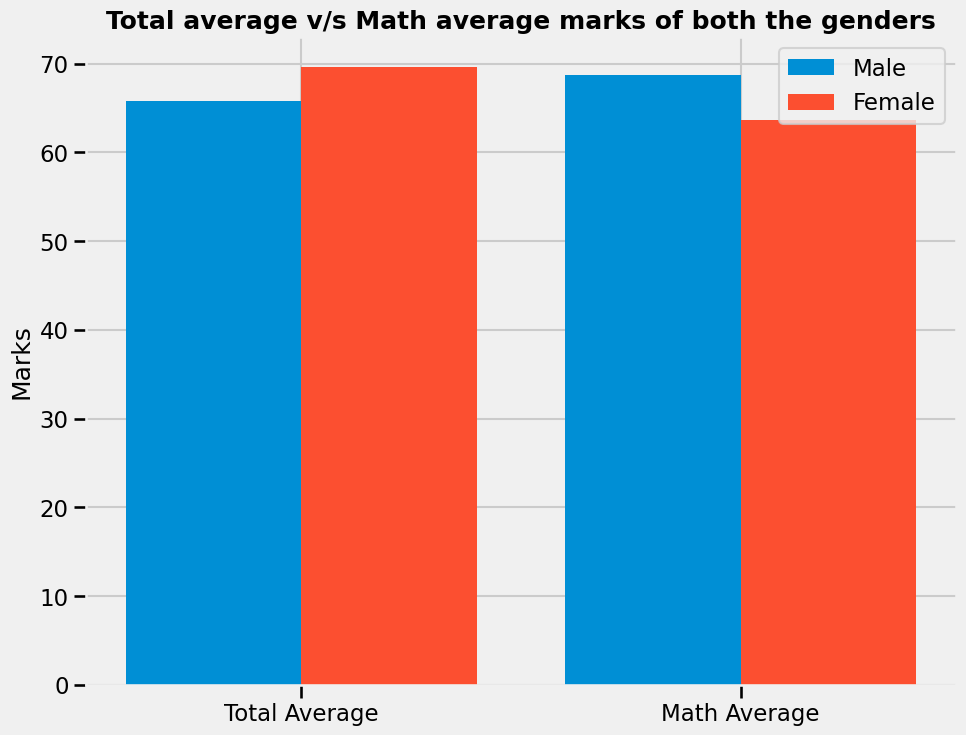

In [87]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [88]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


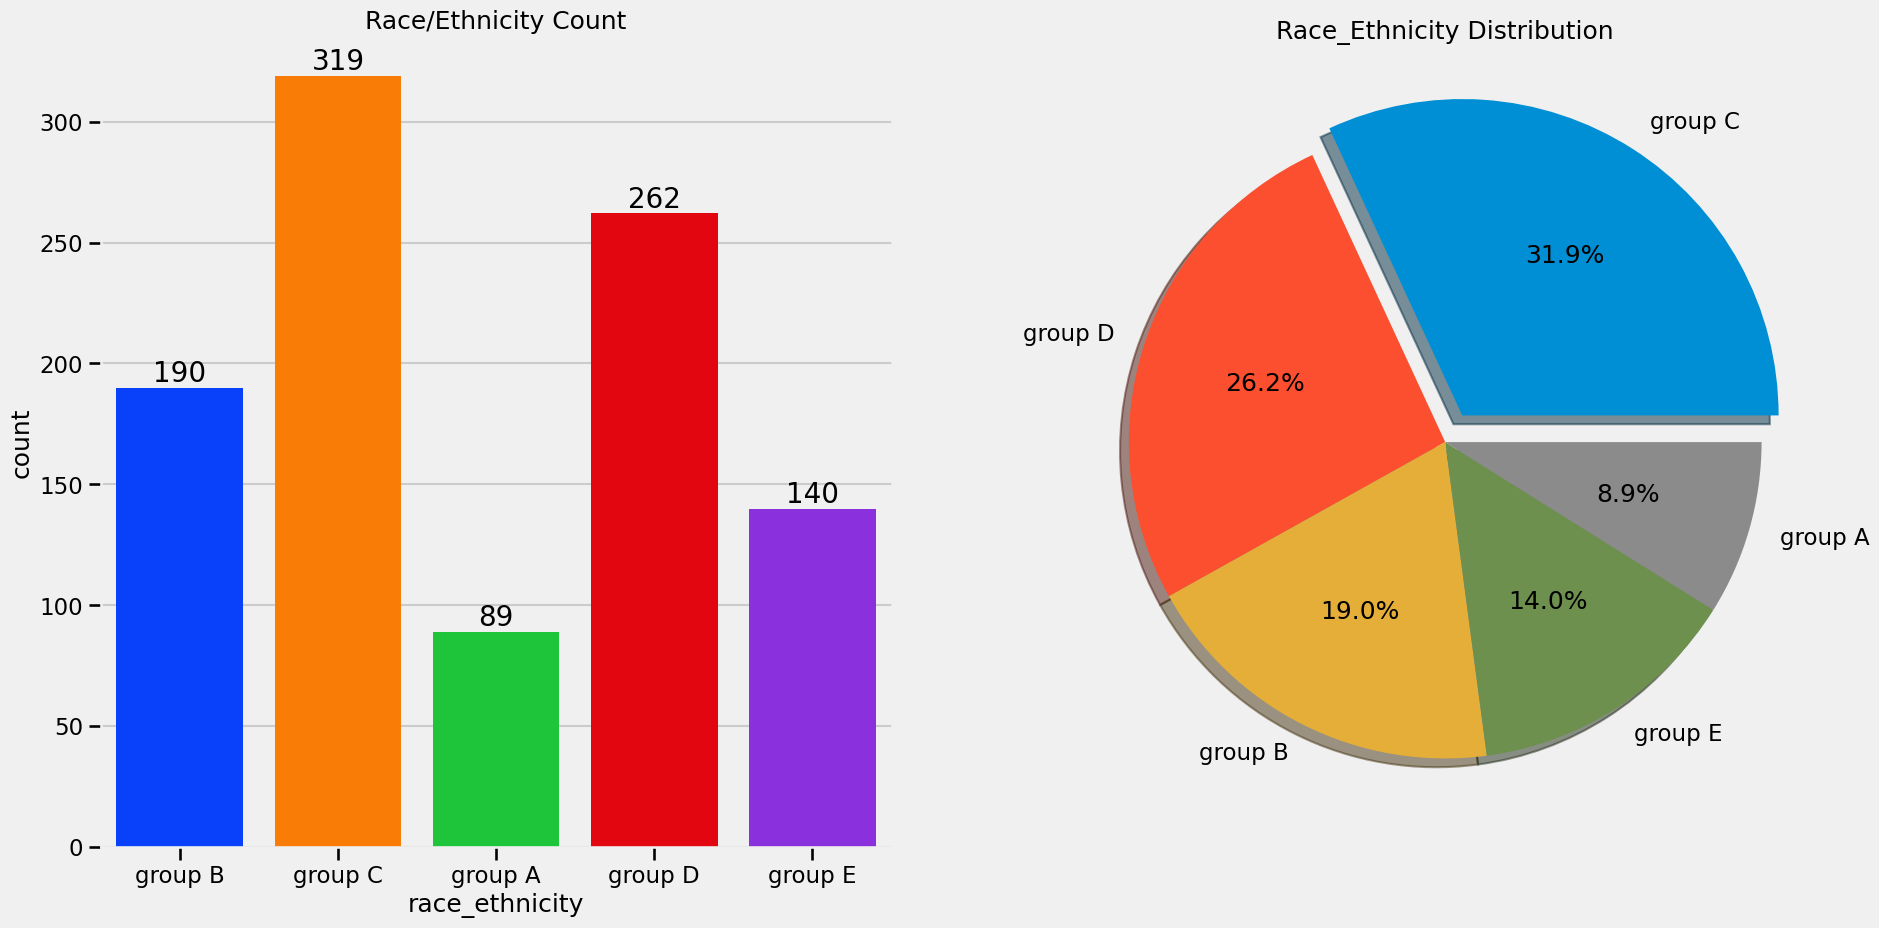

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correcting the column name (assuming it's 'race/ethnicity')
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x='race_ethnicity', data=dataset, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Race/Ethnicity Count', fontsize=18)

# Pie chart on the second axis
ax[1].pie(x=dataset['race_ethnicity'].value_counts(),
          labels=dataset['race_ethnicity'].value_counts().index,
          explode=[0.1, 0, 0, 0, 0],
          autopct='%1.1f%%',
          shadow=True)
ax[1].set_title('Race_Ethnicity Distribution', fontsize=18)

plt.show()


In [90]:
gender_group = dataset.groupby('gender').mean(numeric_only=True)


In [91]:
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


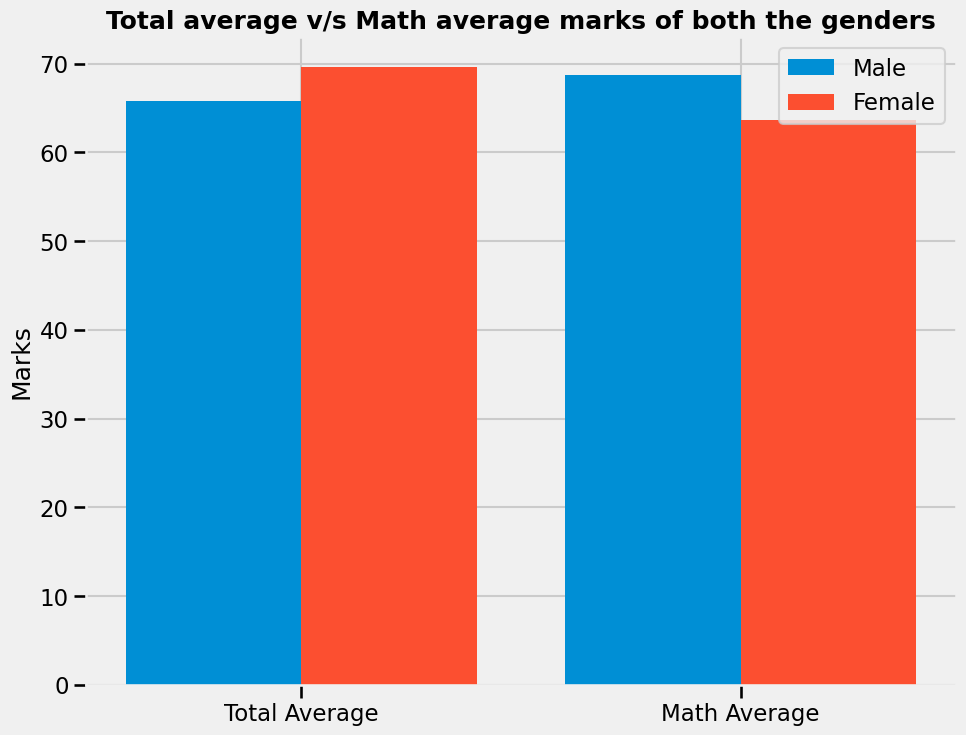

In [92]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [93]:
dataset.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

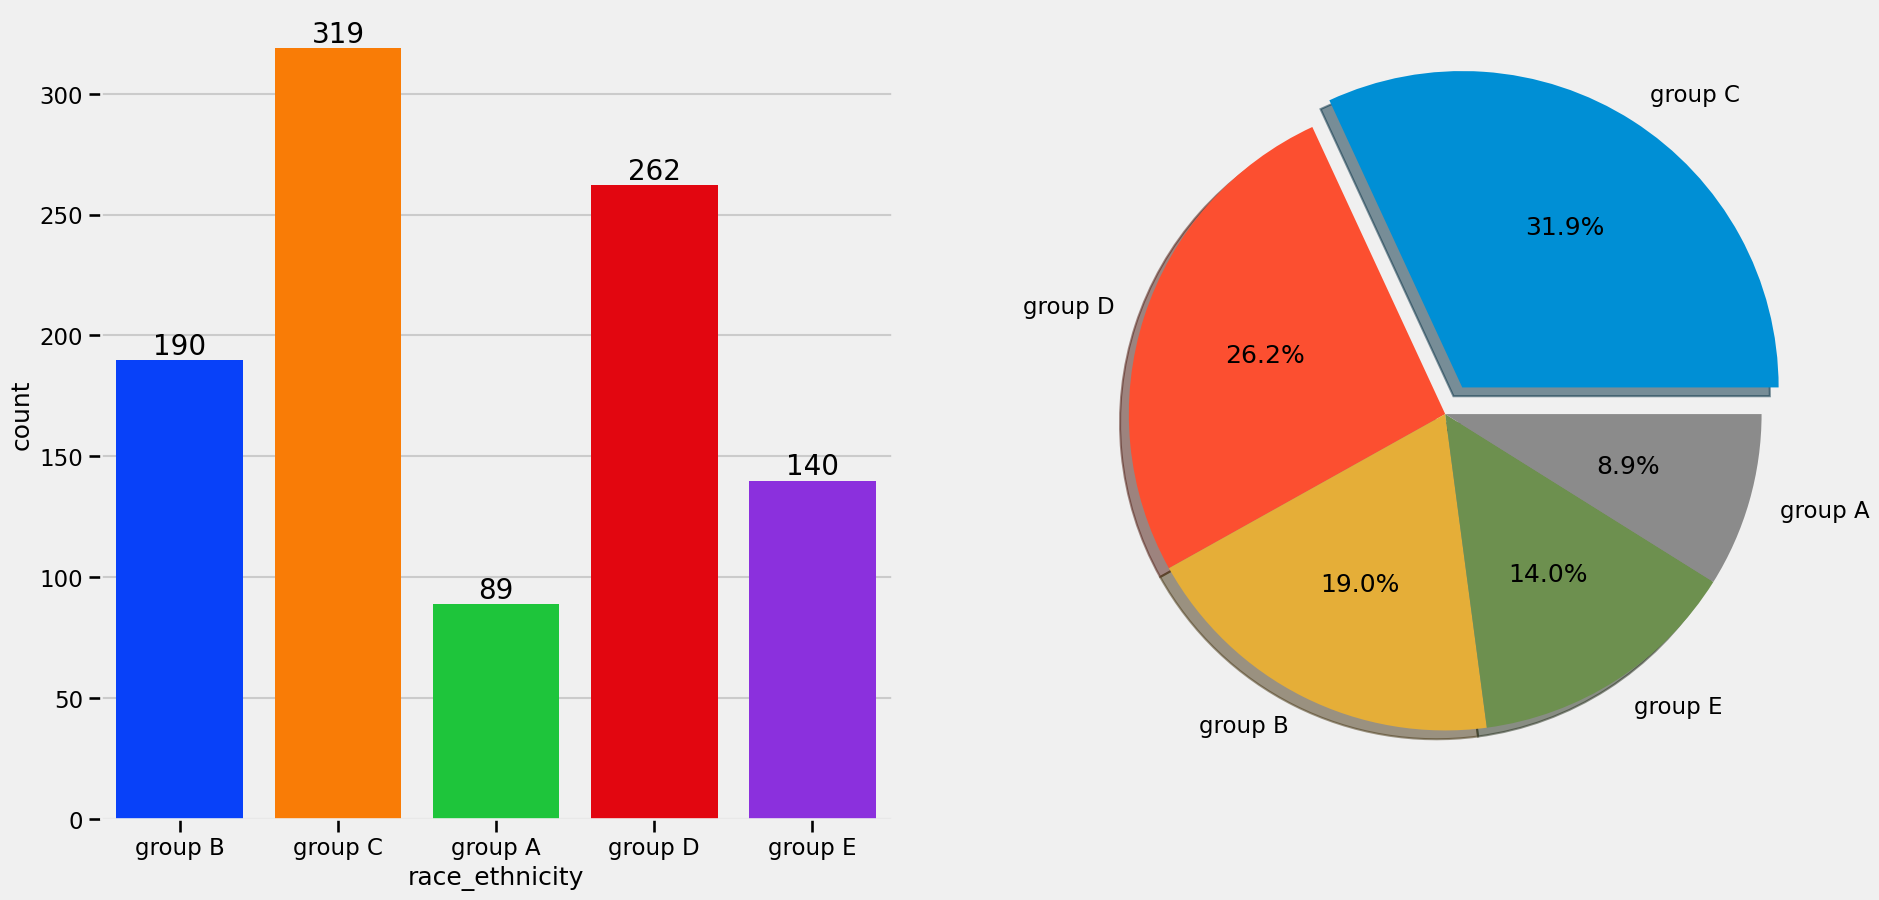

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['race_ethnicity'],data=dataset,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['race_ethnicity'].value_counts(),labels=dataset['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

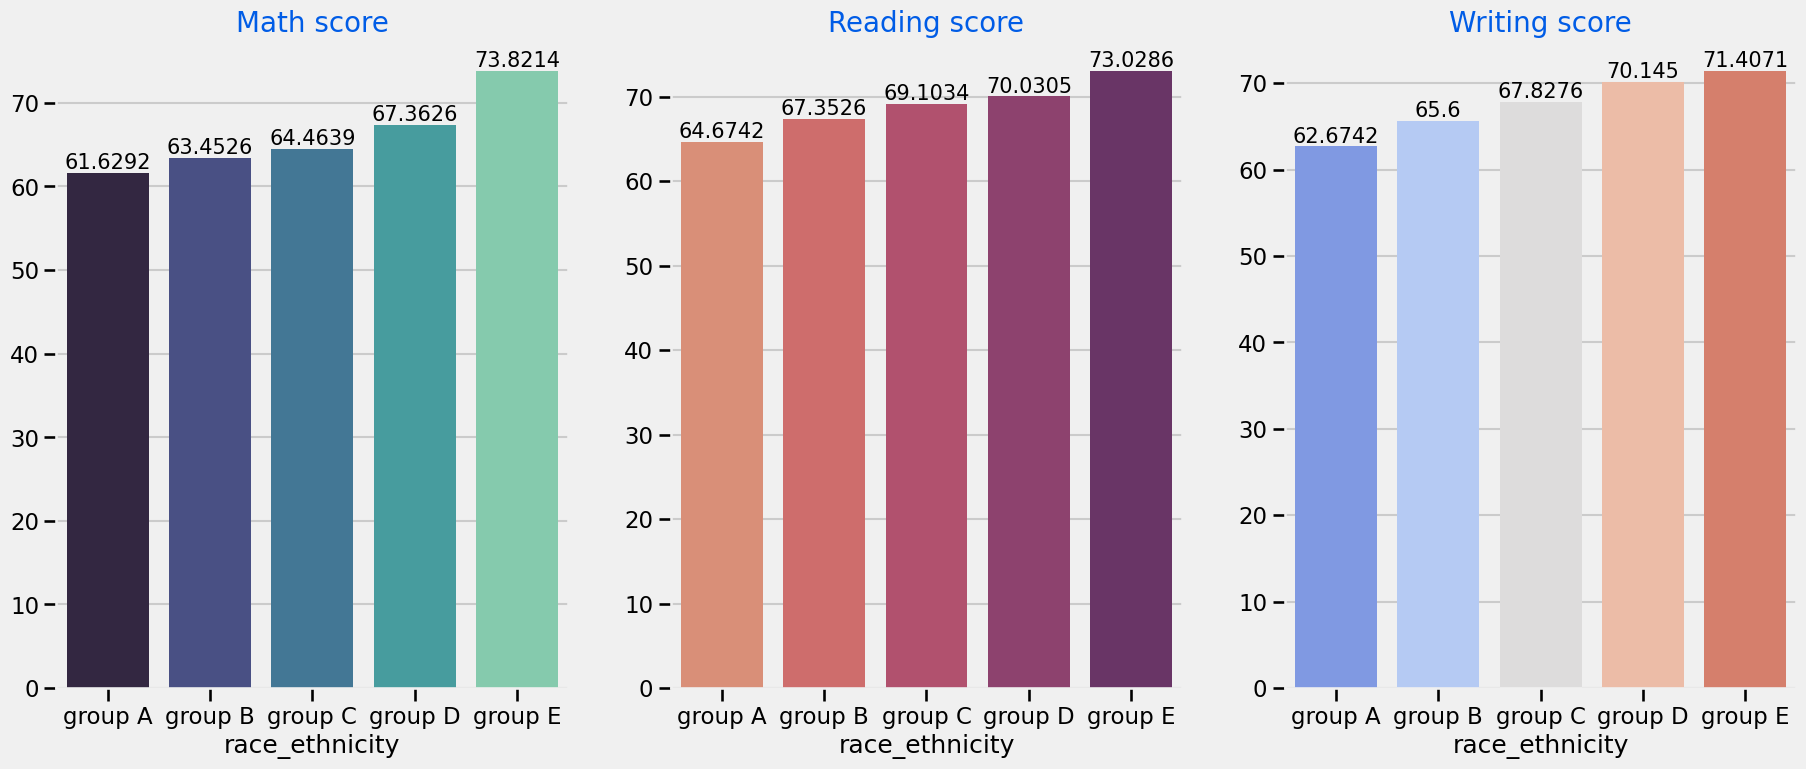

In [95]:
Group_data2=dataset.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

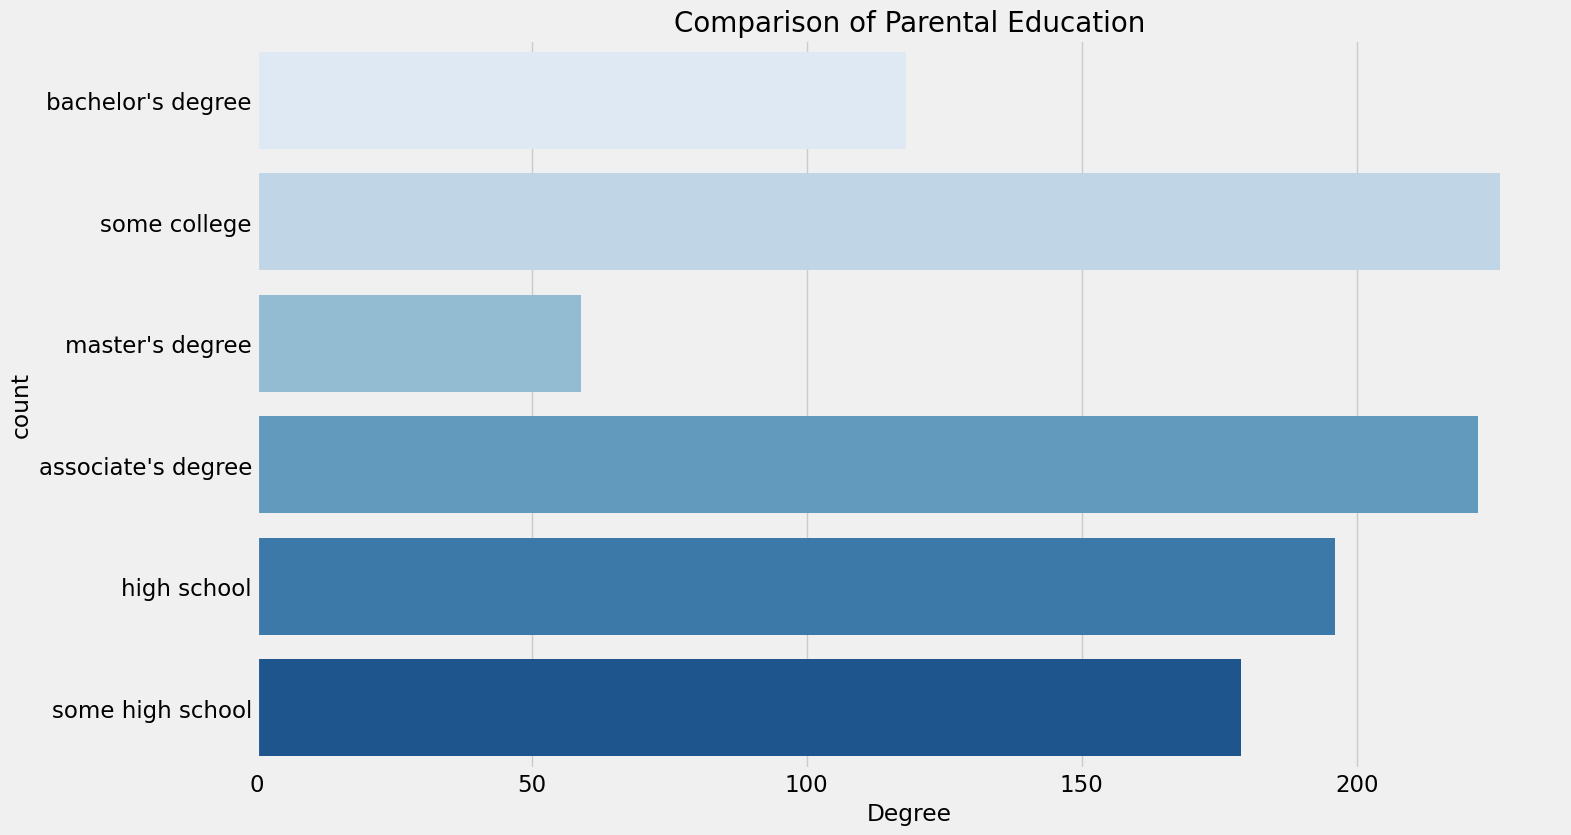

In [96]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(dataset['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

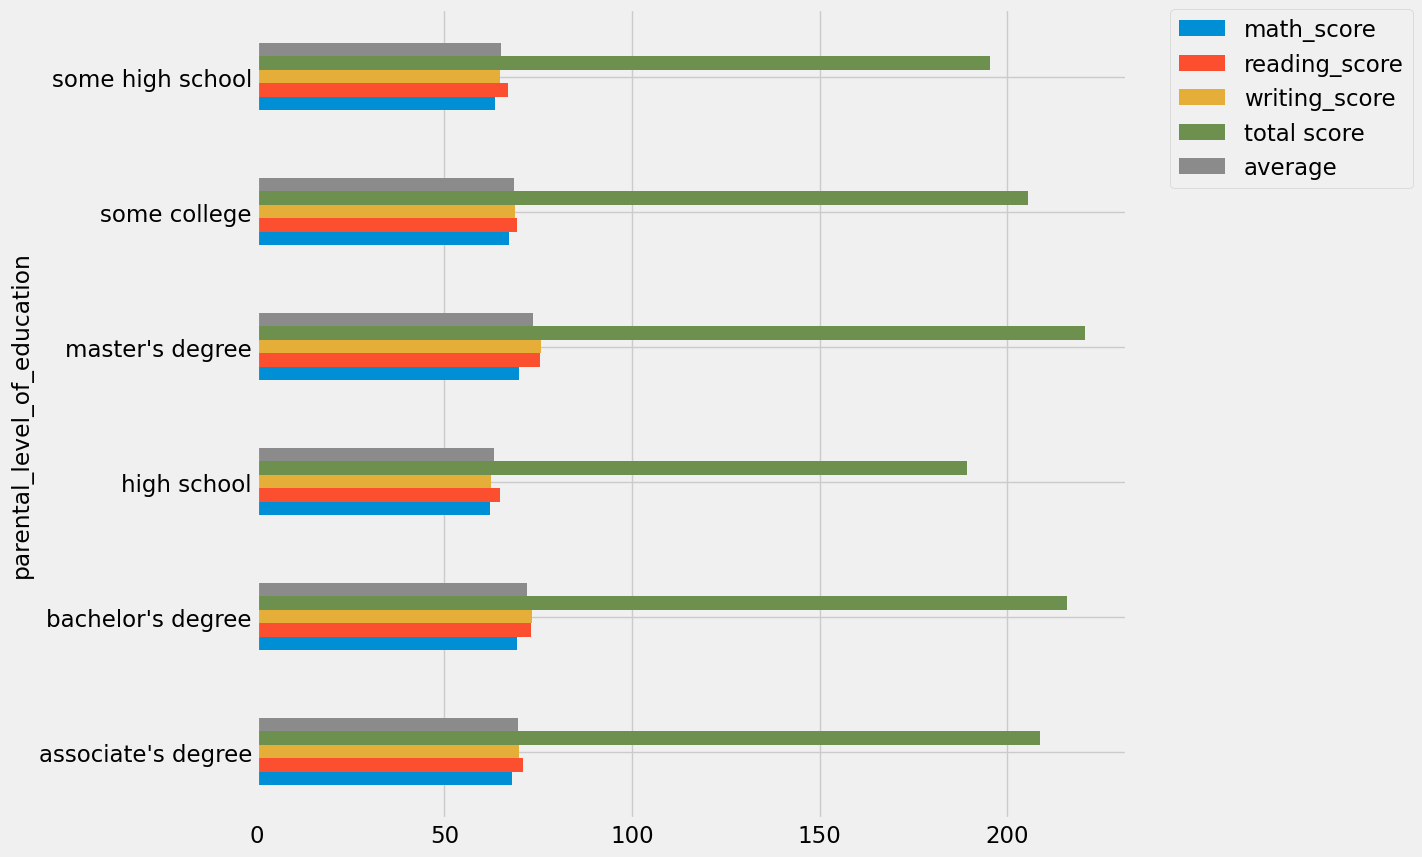

In [97]:
dataset.groupby('parental_level_of_education') \
       .mean(numeric_only=True) \
       .plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


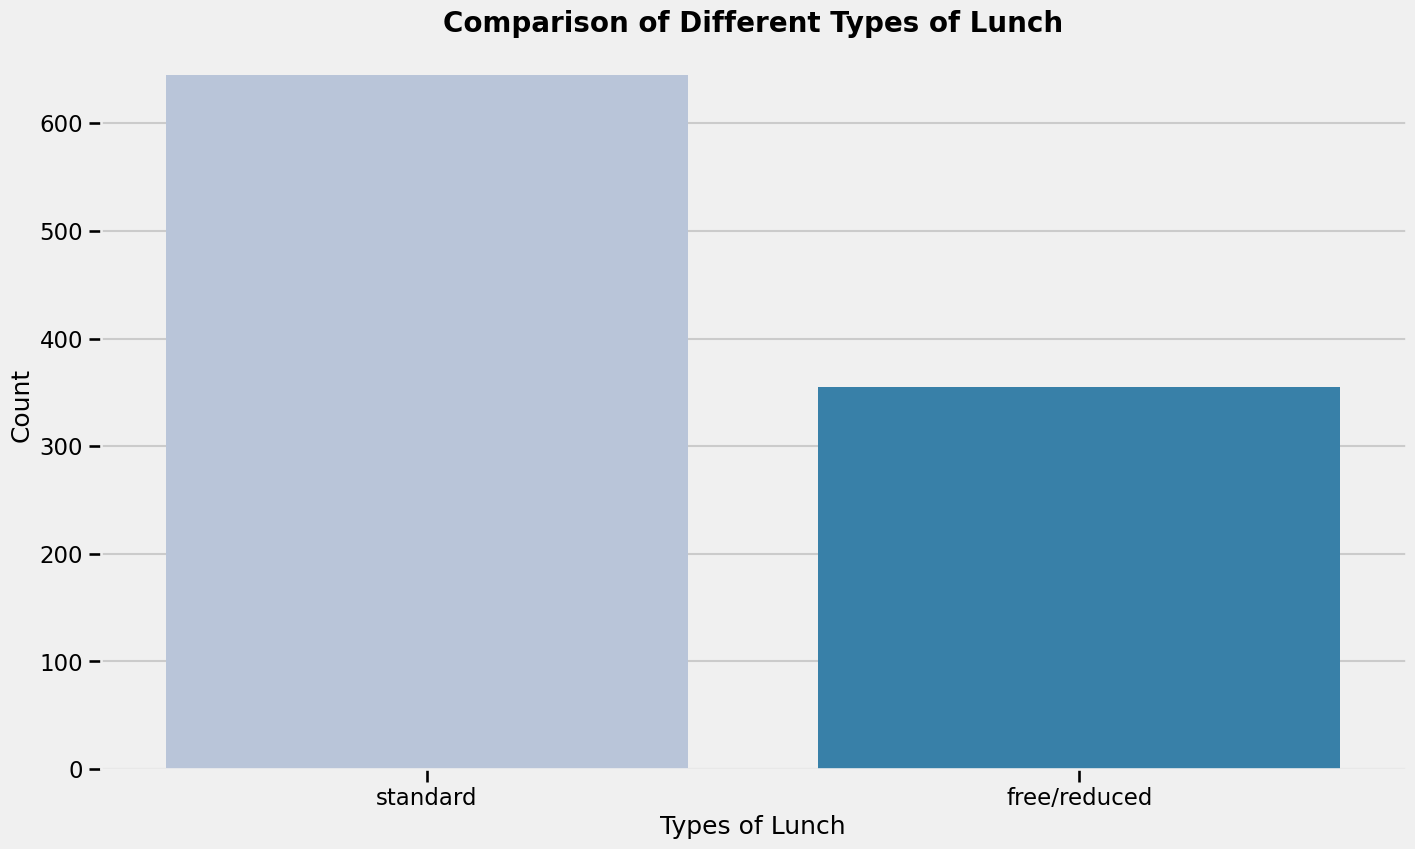

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 9)
sns.set_context('talk')  # Correct way to use 'talk' style in Seaborn

sns.countplot(x='lunch', data=dataset, palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


In [99]:
dataset.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

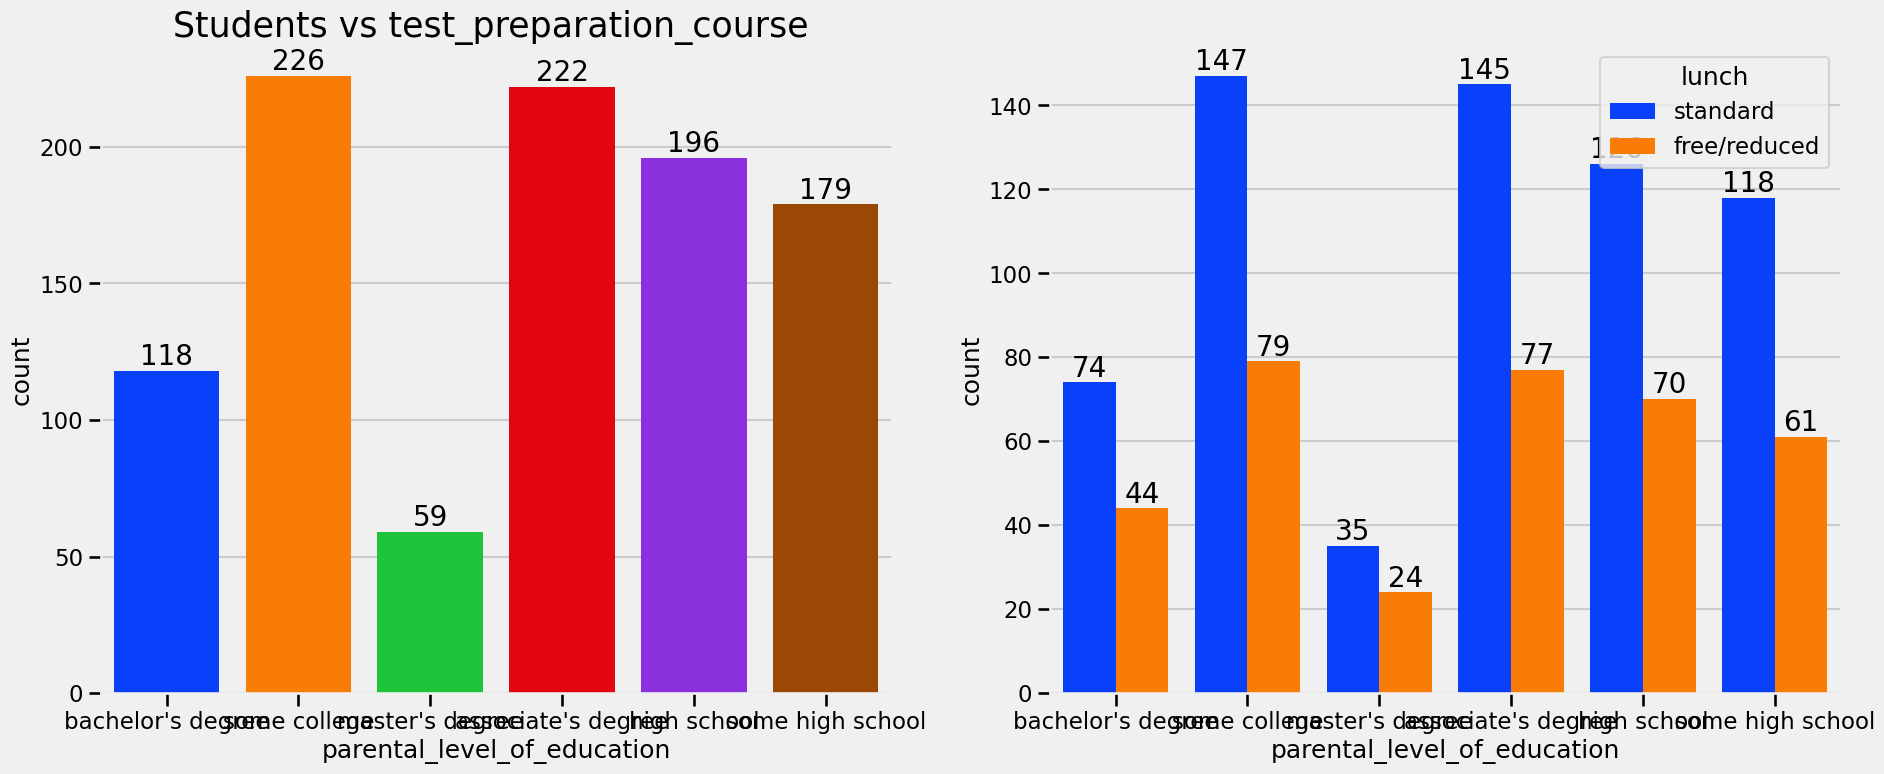

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=dataset['parental_level_of_education'],data=dataset,palette = 'bright',hue='parental_level_of_education',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test_preparation_course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=dataset['parental_level_of_education'],data=dataset,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

In [101]:
dataset.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

<Axes: xlabel='lunch', ylabel='writing_score'>

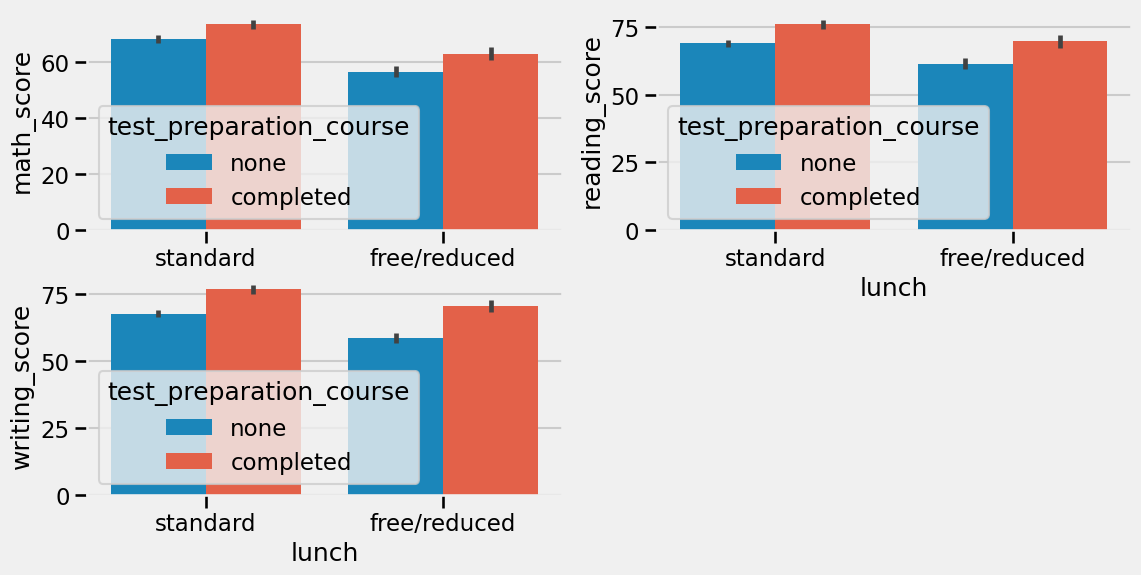

In [102]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing_score'], hue=dataset['test_preparation_course'])

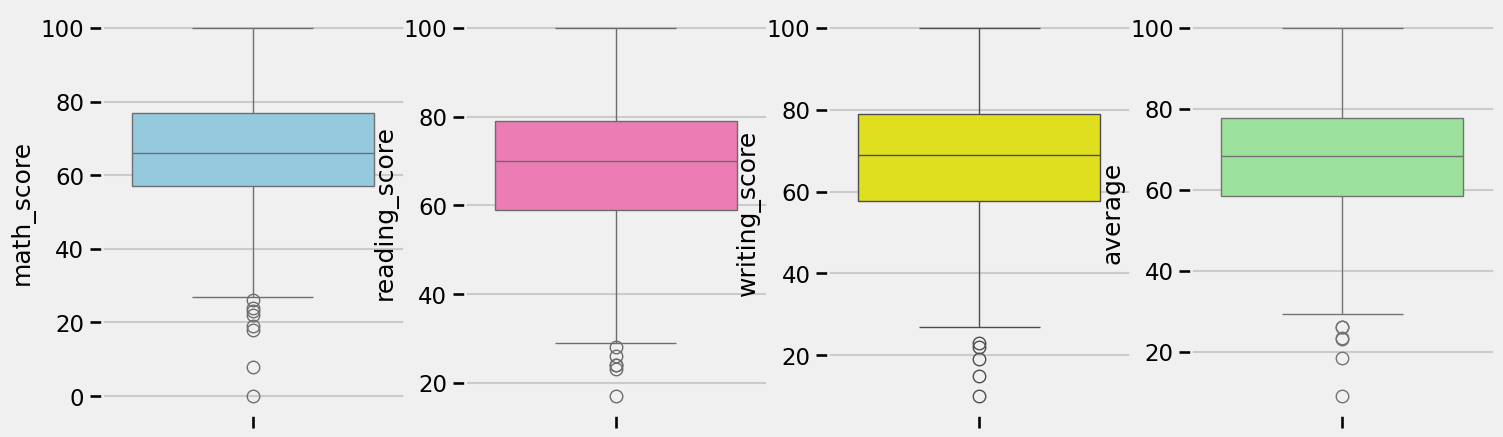

In [103]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

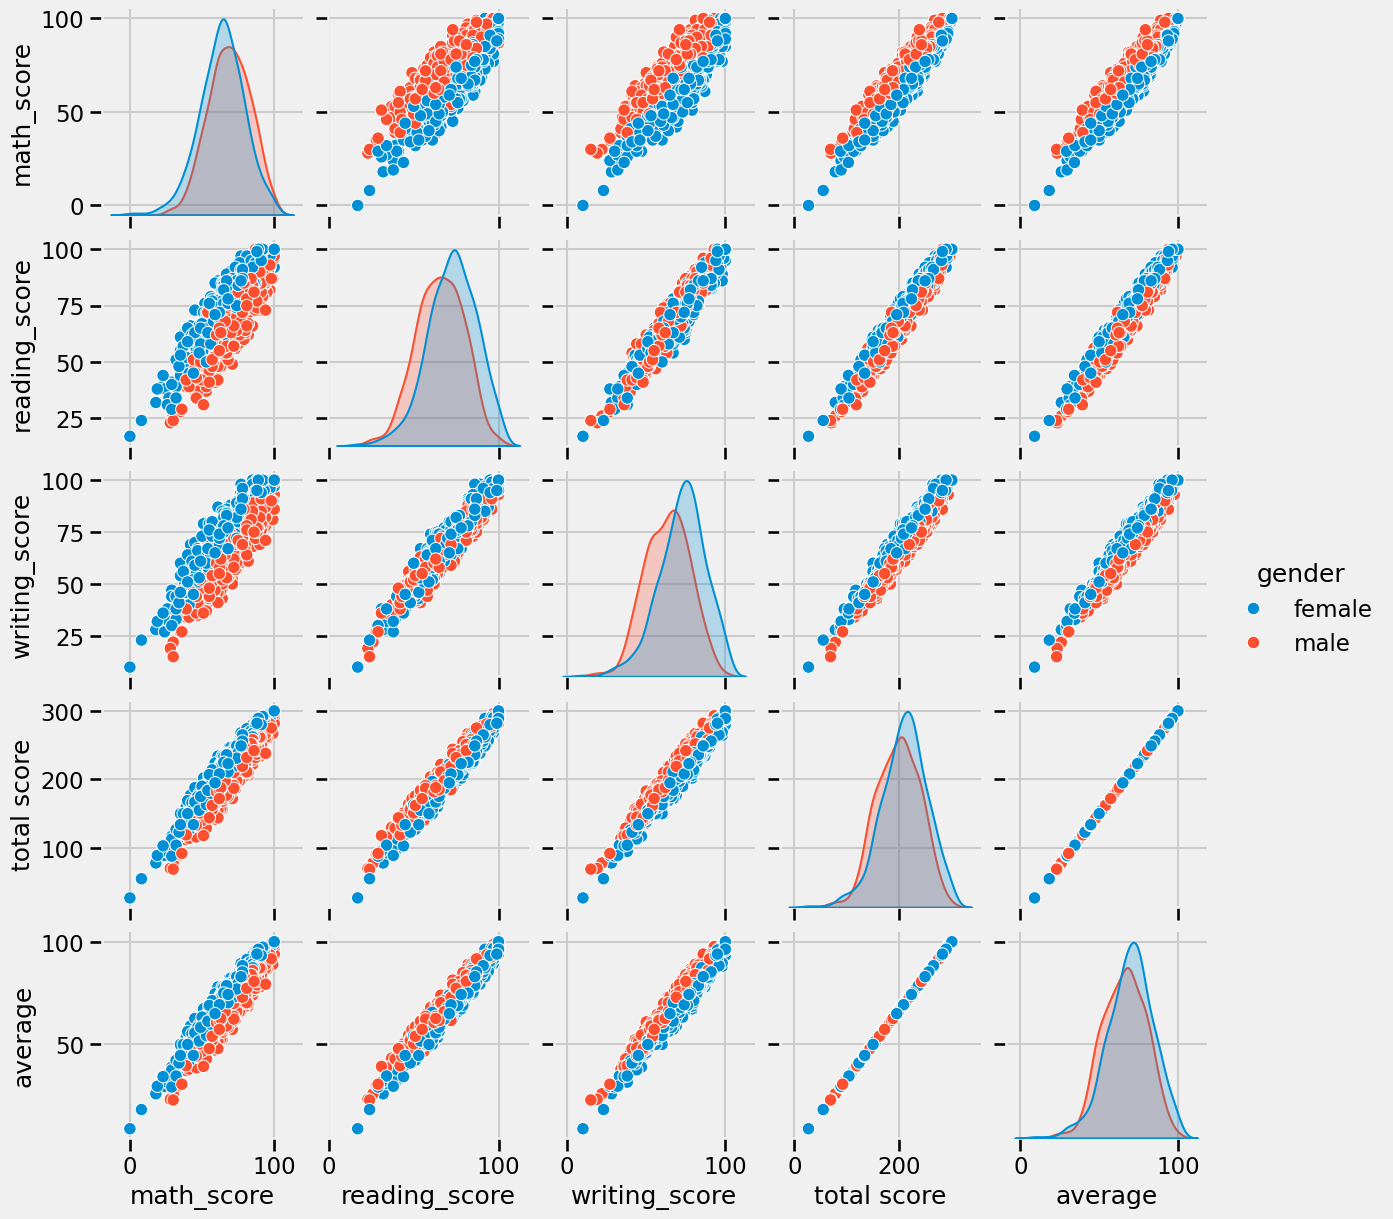

In [104]:
sns.pairplot(dataset,hue = 'gender')
plt.show()